### 1) Вопрос: вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [163]:
df1 = df.loc[259:368] # возьмем часть таблицы (за июль)
df1 = df1[df1.status != 'ПРОСРОЧЕНО'] # удалим все значения, где ['status'] = 'ПРОСРОЧЕНО' 
df1['sum'].sum() # сумма значений в столбце 'sum'
#ОТВЕТ: 859896.4699999997 ≈ 859896.5

859896.4699999997

### 2) Вопрос: как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком. 

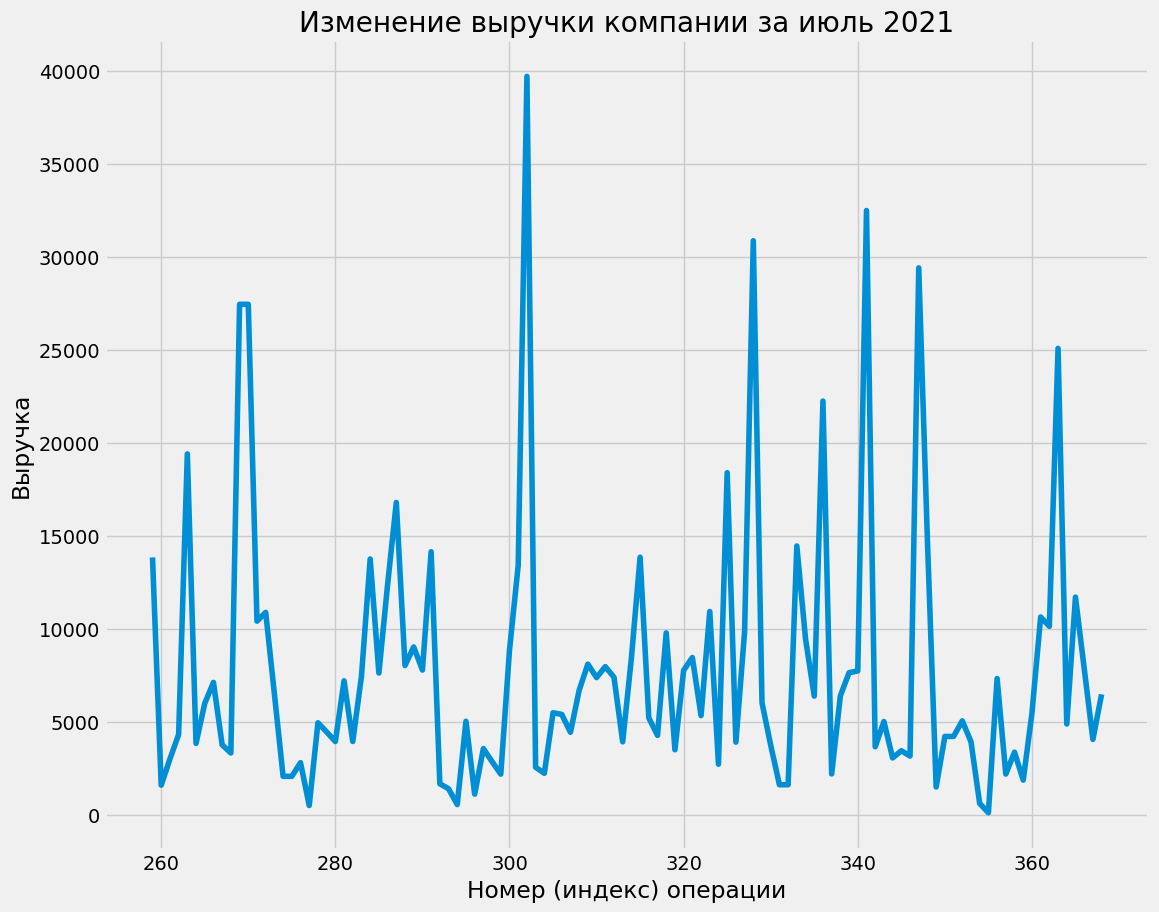

In [259]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 10))
plt.xlabel("Номер (индекс) операции")
plt.ylabel("Выручка")
plt.title("Изменение выручки компании за июль 2021")
plt.plot(df1["sum"])


### 3) Вопрос: кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021? 

In [261]:
df2 = df.loc[485:593] # возьмем часть таблицы (за сентябрь)
df2.groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending =False)
#ОТВЕТ: менеджер Смирнов

,sum
sale,
Смирнов,221525.70
Петрова,149344.46
Андреев,133652.50
Иванов,94770.60
Кузнецова,72228.40
Филимонова,59514.47
Васильев,49895.45
Соколов,35183.50
Михайлов,4268.70


### 4) Вопрос:какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [262]:
df4 = df.loc[595:]
df4
df4.groupby('new/current').agg({'new/current': 'count'})
#Ответ: текущая.

,new/current
new/current,
новая,36
текущая,99


### Задание 2

In [263]:
"""Подсчитаем доходы менеджеров при условии, что статус оплаты «ОПЛАЧЕНО», 
имеется оригинал подписанного договора с клиентом. """ 
df5 = df.loc[2:257]
df5 = df5.loc[(df5['new/current'] == 'новая') & (df5['status'] == 'ОПЛАЧЕНО') & (df5['document'] == 'оригинал')]
df5 = df5.groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending =False)*0.07
df5

,sum
sale,
Селиванов,4336.9130
Петрова,3647.7070
Андреев,1144.3390
Филимонова,727.4680
Кузнецова,424.1321
Васильев,222.7680
Смирнов,213.7590


In [264]:
"""Подсчитаем доходы за текущие сделки менеджеров при условии любого статуса оплаты, кроме «ПРОСРОЧЕНО», 
имеется оригинал подписанного договора с клиентом, сумма сделки больше 10 тыс. """
df6 = df.loc[2:257]
df6 = df6.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО') & (df['document'] == 'оригинал') & \
              (df['sum'] > 10000)]
df6 = df6.groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending =False)*0.05

In [240]:
"""Подсчитаем доходы за текущие сделки менеджеров при условии любого статуса оплаты, кроме «ПРОСРОЧЕНО», 
имеется оригинал подписанного договора с клиентом, сумма сделки меньше 10 тыс. """
df7 = df.loc[2:257]
df7 = df7.loc[(df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО') & (df['document'] == 'оригинал') & \
              (df['sum'] < 10000)]
df7 = df7.groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending =False)*0.03

In [265]:
"""Подсчитаем итоговые доходы менеджеров. "
df8 = pd.concat([df5,df6,df7])
df8.groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending =False)


,sum
sale,
Петрова,17799.5494
Смирнов,10508.9890
Андреев,8744.0334
Иванов,8495.2910
Кузнецова,7101.6217
Селиванов,5651.0120
Филимонова,2727.6409
Васильев,1376.2800
Соколов,269.2110
